In [1]:
import numpy as np
import sklearn
import pandas as pd
import seaborn as sns
import glob
import matplotlib.pyplot as plt
%matplotlib inline
import time
from scipy import signal
from sklearn.preprocessing import MinMaxScaler
from preproc import *
import skimage.io

import random
random.seed(9001)
# plt.figsize['']
plt.rcParams["figure.figsize"] = (10,5)

In [2]:
inspector = get_df(pd.read_csv('../../magnetogram.csv'))
anomalies = pd.read_csv('../../anomalies.csv',decimal=',')
welds = pd.read_csv('../../sections.csv',decimal=',')

In [3]:
inspector.head(3)

,1.1,1.2,1.3,1.4,2.1,2.2,2.3,2.4,3.1,3.2,...,14.3,14.4,15.1,15.2,15.3,15.4,16.1,16.2,16.3,16.4
7.67144,3171,3180,3174,3164,3172,3178,3188,3199,0,0,...,3200,3193,3207,3195,3195,3173,3187,3189,3206,3183
7.67484,3172,3180,3177,3166,3170,3179,3189,3200,0,0,...,3200,3194,3206,3195,3196,3173,3186,3188,3202,3183
7.67819,3171,3176,3177,3165,3172,3176,3190,3199,0,0,...,3200,3189,3206,3194,3198,3175,3186,3191,3201,3182


In [4]:
pipe_defects = []
welf_defects = []
for i in range(len(anomalies)):
    if 'шов' not in anomalies['Местоположение дефекта'].values[i].lower():
        pipe_defects.append(anomalies['Дистанция, м'].values[i])
    else:
        welf_defects.append(anomalies['Дистанция, м'].values[i])       
pipe_defects = np.array(pipe_defects)
welf_defects = np.array(welf_defects)
print("Number of pipe defects:",len(pipe_defects))
print("Number of welds defects:",len(welf_defects))


Number of pipe defects: 711
Number of welds defects: 34


In [5]:
print('total length of dataset',len(inspector))
print('total length of pipeline',inspector.index[-1] - inspector.index[0],'meters')

total length of dataset 4477644
total length of pipeline 15140.12259 meters


In [6]:
welds_locat = welds['Местоположение начала секции по дистанции трубопровода, м'].values

def plot_ins(x1,x2):
    inspector.loc[x1:x2].plot()
    for weld in welds_locat[(welds_locat <= x2) & (welds_locat >= x1)]:
        plt.axvline(weld,color='black')
    plt.legend().remove()
    plt.show()
    
def plot_defects(index_deffect,width=0.2):
    f = plt.figure(figsize=(16,6))
    ax1 = f.add_subplot(121)
    ax2 = f.add_subplot(122)

    x1 = index_deffect-width
    x2 = index_deffect+width
    
    ax2.plot(inspector.loc[x1:x2])
    for weld in welds_locat[(welds_locat <= x2) & (welds_locat >= x1)]:
        ax2.axvline(weld,color='black')
        
    ax1.imshow(inspector.loc[x1:x2].values.T)
    
    plt.show()


In [136]:
for defect in range(20):
    image = inspector.loc[pipe_defects[defect]-0.2:pipe_defects[defect]+0.3].T
    insp= image.values[:,:128].copy()
    image[image==0.0]=np.nan
    image = image.values
    image = image[:,:128]
    
    # image = image.astype(np.uint8)
    skimage.io.imsave('./pics/init/{}.png'.format(defect),image)
    image = skimage.io.imread('./pics/init/{}.png'.format(defect))
    image[image==255]=254    
    skimage.io.imsave('./pics/init/{}.png'.format(defect),image)
    print(image.shape)


Lossy conversion from float64 to uint8. Range [2681.0, 3264.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [2797.0, 3196.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [2878.0, 3236.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [2722.0, 3150.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [2734.0, 3192.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [2765.0, 3229.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [2711.0, 3208.0]. Convert image to uint8 prior to saving to suppress this warning.


(64, 128)
(64, 128)
(64, 128)
(64, 128)
(64, 128)
(64, 128)


Lossy conversion from float64 to uint8. Range [2710.0, 3300.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [2638.0, 3237.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [2676.0, 3206.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [2694.0, 3177.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [2841.0, 3218.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [2828.0, 3225.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [2864.0, 3183.0]. Convert image to uint8 prior to saving to suppress this warning.


(64, 128)
(64, 128)
(64, 128)
(64, 128)
(64, 128)
(64, 128)
(64, 128)


Lossy conversion from float64 to uint8. Range [2861.0, 3863.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [2809.0, 3217.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [2810.0, 3162.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [2751.0, 3147.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [2830.0, 3206.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [2777.0, 3246.0]. Convert image to uint8 prior to saving to suppress this warning.


(64, 128)
(64, 128)
(64, 128)
(64, 128)
(64, 128)
(64, 128)
(64, 128)


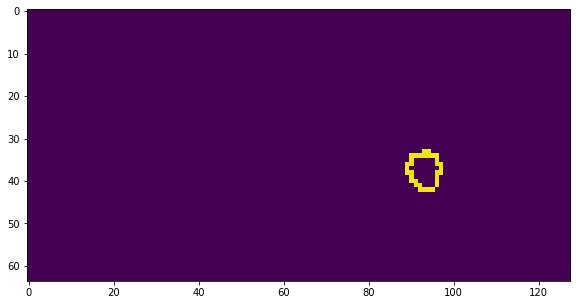

In [137]:
plt.imshow(insp * mask)

In [139]:
(insp * mask).min()

0

In [117]:
image = skimage.io.imread('./pics/done/1.png')
# image[image!=255]=0
# image[image==255]=1
# image

In [118]:
from skimage import color


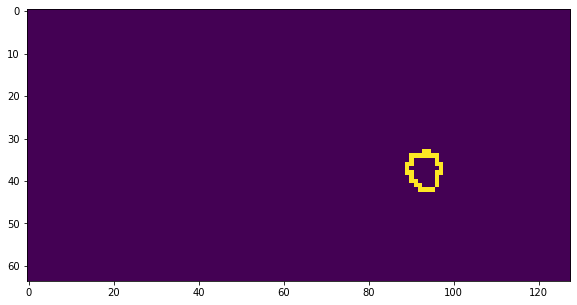

In [140]:
image = skimage.io.imread('./pics/done/19.png')
image = image[:,:,:3]
mask = image[:,:,0]
mask[mask!=255]=0
mask[mask==255]=1
mask.astype(float)
plt.imshow(mask)

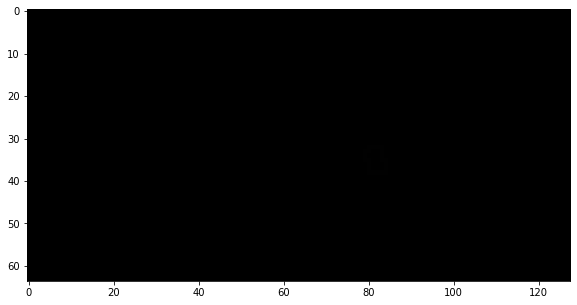

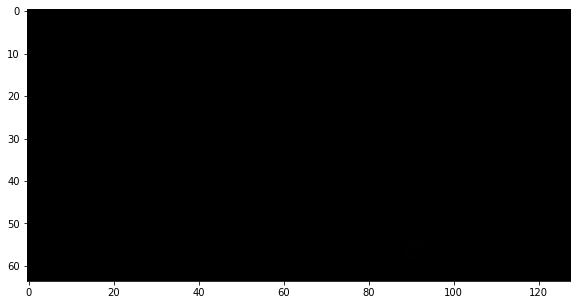

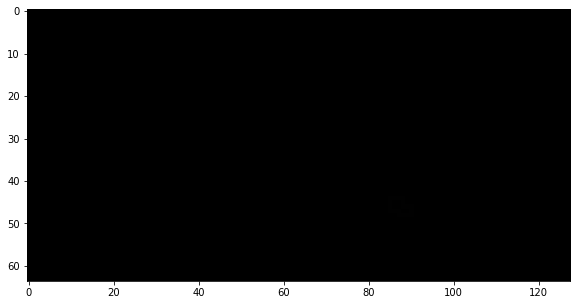

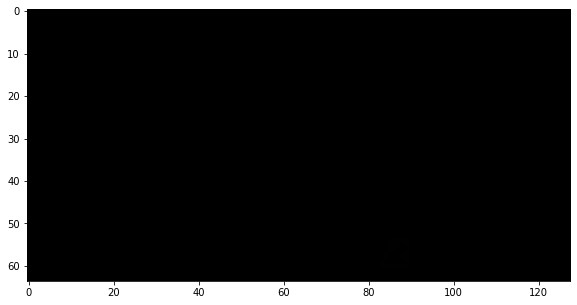

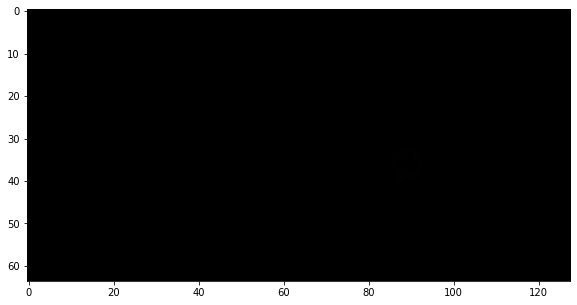

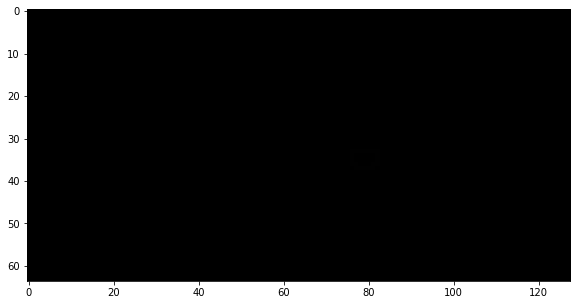

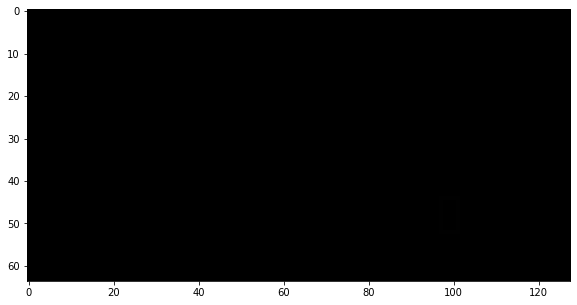

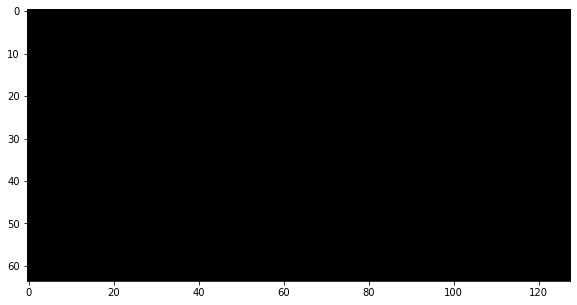

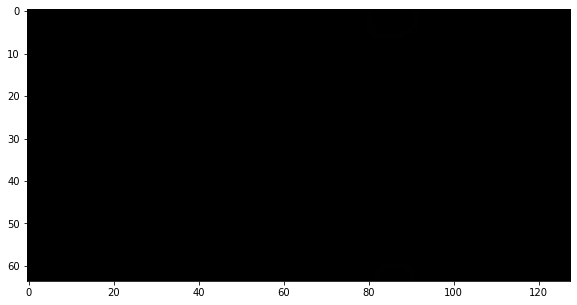

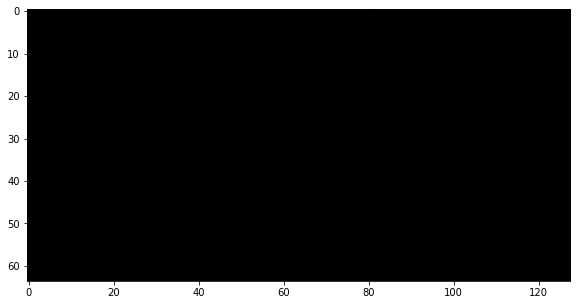

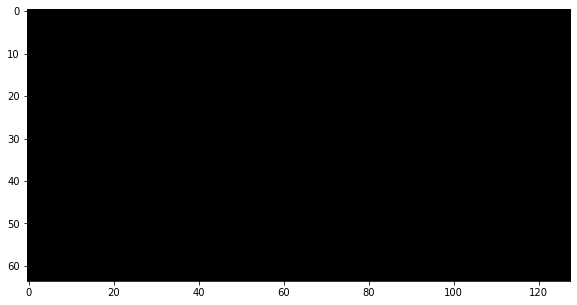

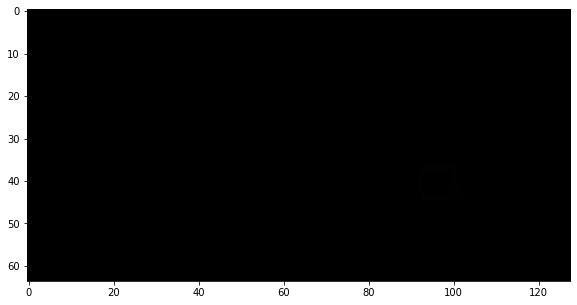

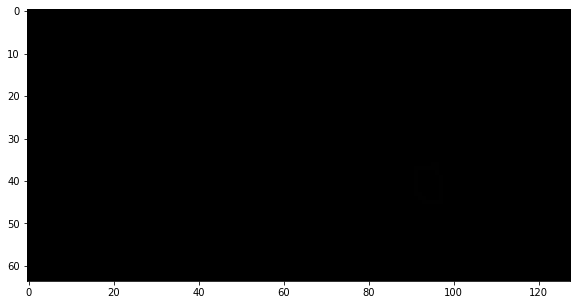

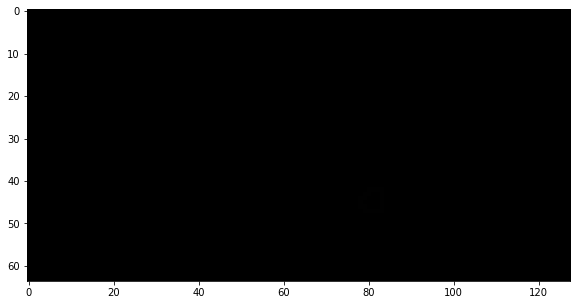

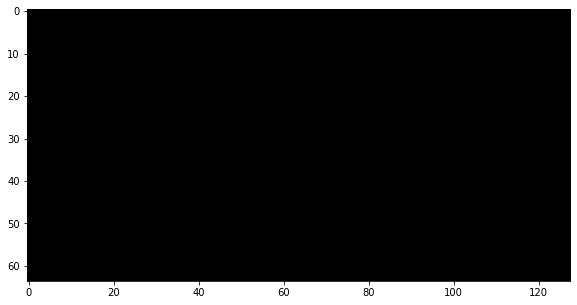

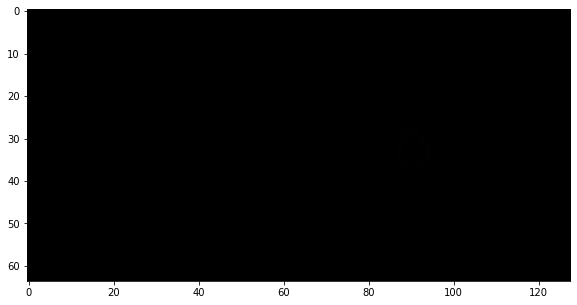

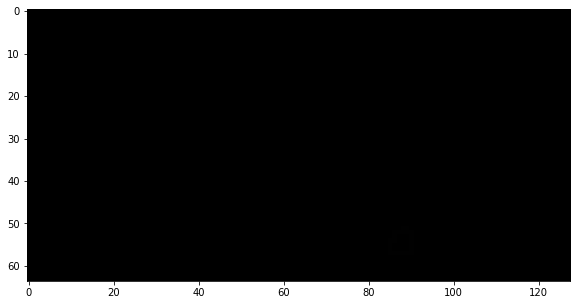

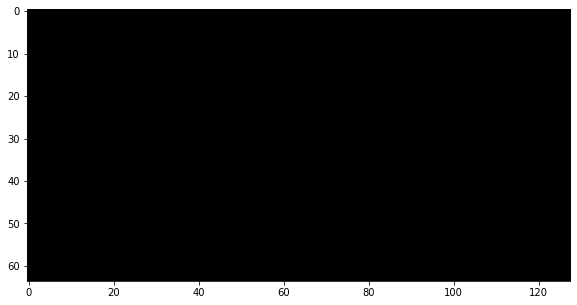

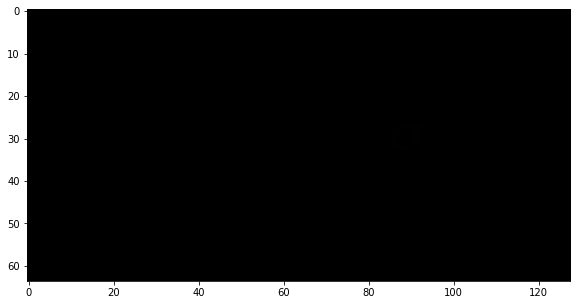

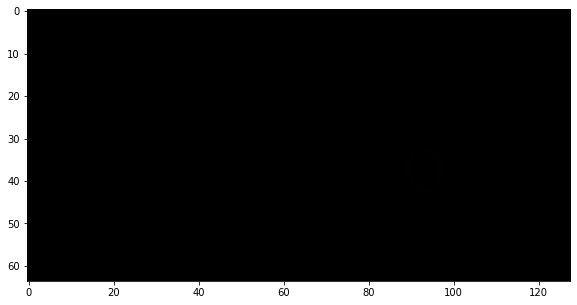

In [108]:
for defect in range(20):
    image = skimage.io.imread('./pics/done/{}.png'.format(defect))
    image = image[:,:,:3]
    image[image!=255]=0
    image[image==255]=1
#     image.astype(bool).astype(int)
    plt.imshow(image)
    plt.show()


In [24]:
skimage.io.imsave('1.png',image.values)

Lossy conversion from float64 to uint8. Range [2681.0, 3264.0]. Convert image to uint8 prior to saving to suppress this warning.


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: The coordinates used by `active_contour` will change from xy coordinates (transposed from image dimensions) to rc coordinates in scikit-image 0.18. Set `coordinates='rc'` to silence this warning. `coordinates='xy'` will restore the old behavior until 0.18, but will stop working thereafter.
  import sys


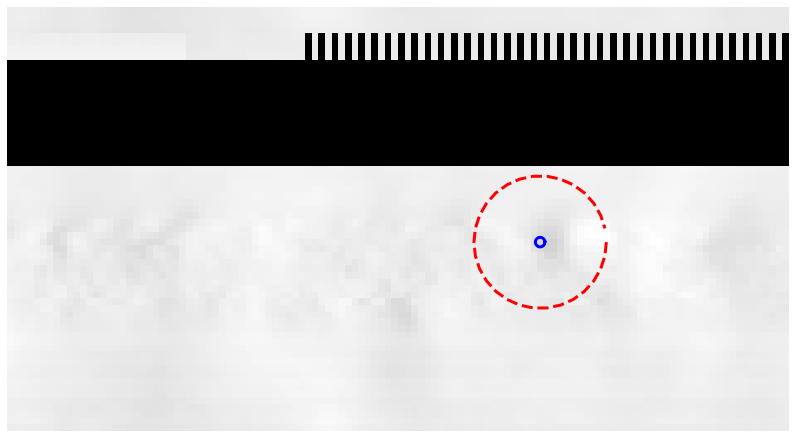

In [46]:
import skimage.segmentation as seg
import skimage.color as color


points = circle_points(31, [35, 80], 10)[:-1]
image_gray = color.rgb2gray(image) 
snake = seg.active_contour(image_gray, points)
fig, ax = image_show(image)


ax.plot(points[:, 0], points[:, 1], '--r', lw=3)
ax.plot(snake[:, 0], snake[:, 1], '-b', lw=3);

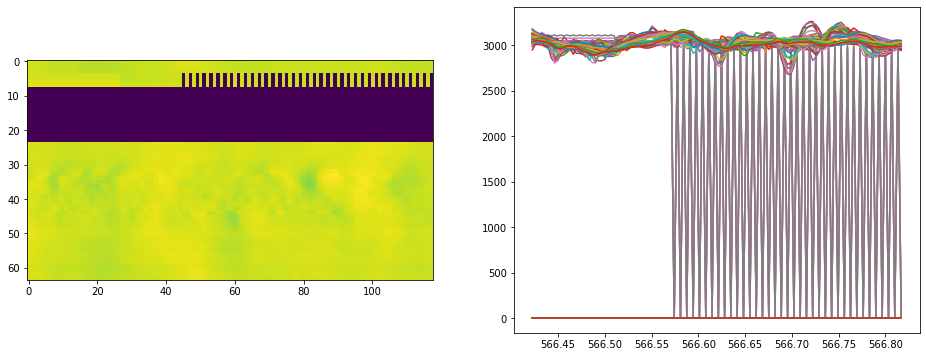

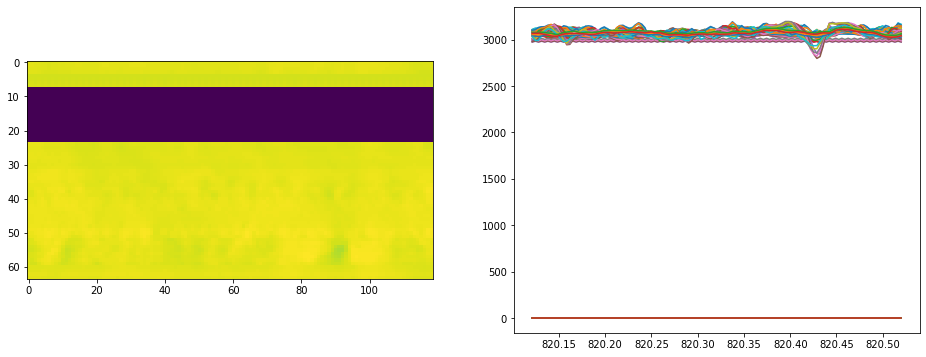

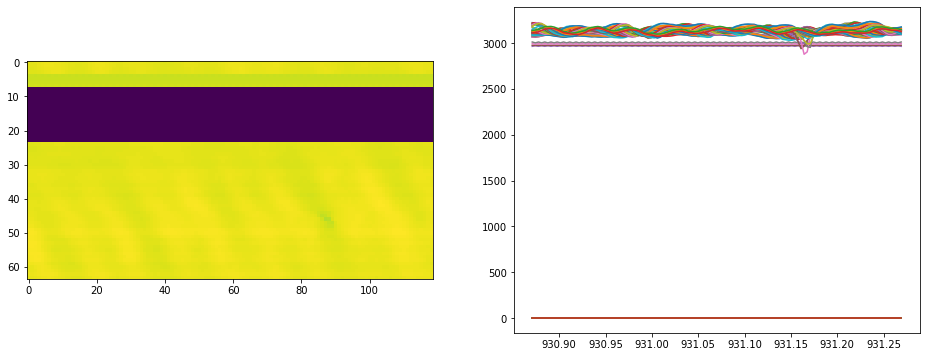

In [25]:
for defect in pipe_defects[:3]:
    plot_defects(defect)